In [17]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library
import geocoder

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/Edwin-K78/ADS-Capstone/master/zomato.csv',encoding='ISO-8859-1')
df.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
df_brasil = df[df['Country Code'] == 30]
df_rio = df_brasil[df_brasil['City'] == 'Rio de Janeiro']
df_rio.reset_index(drop=True, inplace=True)
df_rio.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7303219,Pesqueiro Eco Gourmet,30,Rio de Janeiro,"Praia da Barra da Tijuca, Avenida Lí_cio Costa...",Barra da Tijuca,"Barra da Tijuca, Rio de Janeiro",-43.377000,-23.011500,"Seafood, Bar Food, Brazilian",...,Brazilian Real(R$),No,No,No,No,4,4.0,Green,Very Good,7
1,7304307,Confeitaria Colombo,30,Rio de Janeiro,"Rua Goní_alves Dias, 32, Centro, Rio de Janeiro",Centro,"Centro, Rio de Janeiro",-43.178826,-22.905293,"Desserts, Cafe",...,Brazilian Real(R$),No,No,No,No,4,4.8,Dark Green,Excellent,29
2,7301215,Bibi,30,Rio de Janeiro,"Rua Santa Clara, 36, Copabana, Rio de Janeiro",Copacabana,"Copacabana, Rio de Janeiro",-43.186692,-22.972072,"Juices, Healthy Food",...,Brazilian Real(R$),No,No,No,No,3,4.7,Dark Green,Excellent,24
3,7300596,Cervantes,30,Rio de Janeiro,"Avenida Prado Junior, 335 B, Copacabana, Rio d...",Copacabana,"Copacabana, Rio de Janeiro",-43.175833,-22.962167,"Beverages, Bar Food, Fast Food",...,Brazilian Real(R$),No,No,No,No,3,4.5,Dark Green,Excellent,29
4,7300612,Amir,30,Rio de Janeiro,"Rua Ronald de Carvalho, 55, Copacabana, Rio de...",Copacabana,"Copacabana, Rio de Janeiro",-43.176000,-22.965167,Lebanese,...,Brazilian Real(R$),No,No,No,No,4,4.2,Green,Very Good,11


### Cleaning the data by removing unwanted columns and rows

In [19]:
df_Res = df_rio[df_rio.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [20]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Pesqueiro Eco Gourmet,Barra da Tijuca,-43.377000,-23.011500,"Seafood, Bar Food, Brazilian",4.0,Very Good,7
1,Confeitaria Colombo,Centro,-43.178826,-22.905293,"Desserts, Cafe",4.8,Excellent,29
2,Bibi,Copacabana,-43.186692,-22.972072,"Juices, Healthy Food",4.7,Excellent,24
3,Cervantes,Copacabana,-43.175833,-22.962167,"Beverages, Bar Food, Fast Food",4.5,Excellent,29
4,Amir,Copacabana,-43.176000,-22.965167,Lebanese,4.2,Very Good,11


### Create map of Rio 

In [27]:
Rio_Rest = folium.Map(location=[-43.1729, -22.9068], zoom_start=5)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Rio_Rest)  

Rio_Rest

### Location of best restaurants in Rio

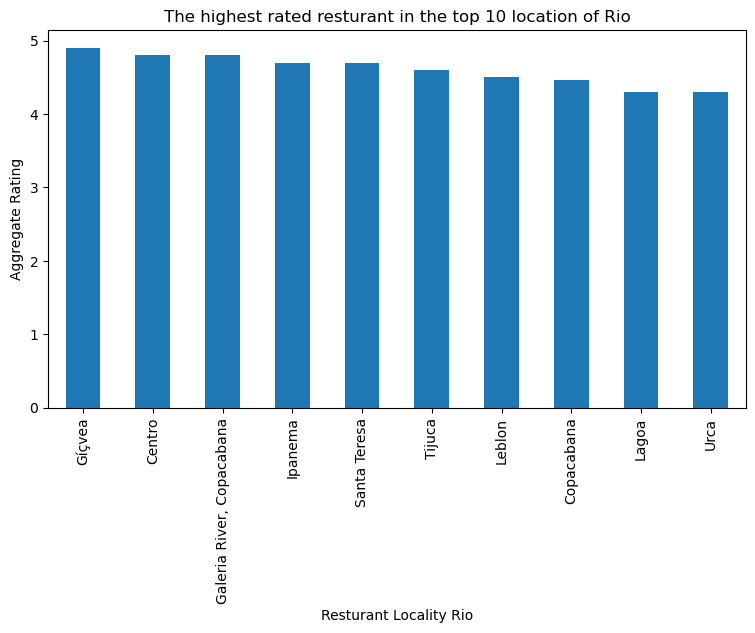

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in the top 10 location of Rio')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality Rio')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

### Location of worst restaurants in Rio

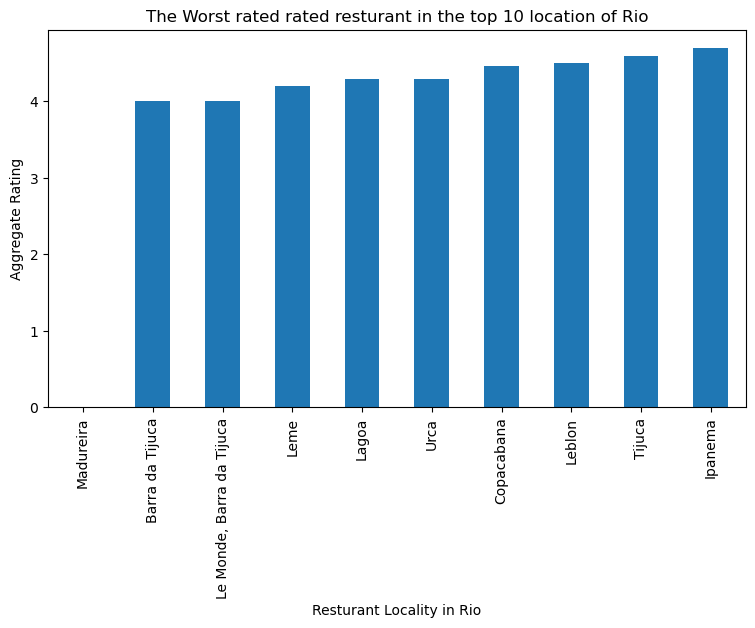

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated rated resturant in the top 10 location of Rio')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Rio')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

### Transforming the data

In [31]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

In [32]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Barra da Tijuca,-23.011500,-43.377000,1,"Seafood, Bar Food, Brazilian",4.000000,Very Good,7
1,Centro,-22.905293,-43.178826,1,"Desserts, Cafe",4.800000,Excellent,29
2,Copacabana,-22.966469,-43.179508,3,"Juices, Healthy Food, Beverages, Bar Food, Fas...",4.466667,"Excellent, Very Good",64
3,"Galeria River, Copacabana",-22.986833,-43.191000,1,Burger,4.800000,Excellent,19
4,Gíçvea,-22.973507,-43.227042,1,"Brazilian, Bar Food",4.900000,Excellent,40


In [33]:
df_final.shape

(13, 8)

In [34]:
CLIENT_ID = 'OKACDRRKIGSZ2J5GXJ1WA5WPOVPZ3GBV3AB5WYHM2NNNLAEZ' # your Foursquare ID
CLIENT_SECRET = 'B2L5YVF3WFDNF3CMKJT4B3G5E1SX1TEX3VV3R05Y15CTUMQJ' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OKACDRRKIGSZ2J5GXJ1WA5WPOVPZ3GBV3AB5WYHM2NNNLAEZ
CLIENT_SECRET:B2L5YVF3WFDNF3CMKJT4B3G5E1SX1TEX3VV3R05Y15CTUMQJ


### Find all the venues in Foursquare Rio


In [35]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [36]:
rio_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

Barra da Tijuca
Centro
Copacabana
Galeria River, Copacabana
Gíçvea
Ipanema
Lagoa
Le Monde, Barra da Tijuca
Leblon
Leme
Santa Teresa
Tijuca
Urca


In [37]:
rio_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Barra da Tijuca,14,14,14,14,14,14
Centro,100,100,100,100,100,100
Copacabana,64,64,64,64,64,64
"Galeria River, Copacabana",56,56,56,56,56,56
Gíçvea,75,75,75,75,75,75
Ipanema,87,87,87,87,87,87
Lagoa,40,40,40,40,40,40
"Le Monde, Barra da Tijuca",93,93,93,93,93,93
Leblon,100,100,100,100,100,100


In [38]:
print('There are {} uniques categories.'.format(len(rio_venues['Venue Category'].unique())))

There are 174 uniques categories.


In [40]:
## Analyze Each Locality

# one hot encoding
rio_onehot = pd.get_dummies(rio_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
rio_onehot['Locality'] = rio_venues['Locality'] 

# move Locality column to the first column
column_list = rio_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
rio_onehot = rio_onehot[column_list]

rio_onehot.head()

,Locality,Accessories Store,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Volleyball Court,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barra da Tijuca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barra da Tijuca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barra da Tijuca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barra da Tijuca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barra da Tijuca,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


</b>Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category </b>

In [61]:
rio_grouped = rio_onehot.groupby('Locality').mean().reset_index()
rio_grouped

,Locality,Accessories Store,Airport Lounge,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Volleyball Court,Waterfront,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Barra da Tijuca,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Centro,0.000000,0.000000,0.000000,0.000000,0.010000,0.01,0.000000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000
2,Copacabana,0.000000,0.000000,0.000000,0.000000,0.015625,0.00,0.000000,0.015625,0.000000,...,0.000000,0.000000,0.015625,0.000000,0.000000,0.015625,0.000000,0.015625,0.000000,0.000000
3,"Galeria River, Copacabana",0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000
4,Gíçvea,0.013333,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.013333,0.013333
5,Ipanema,0.011494,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.011494,...,0.022989,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011494,0.000000
6,Lagoa,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.025000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000
7,"Le Monde, Barra da Tijuca",0.000000,0.010753,0.010753,0.010753,0.000000,0.00,0.000000,0.000000,0.000000,...,0.010753,0.010753,0.000000,0.000000,0.000000,0.000000,0.010753,0.000000,0.010753,0.000000
8,Leblon,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000
9,Leme,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.011905,0.011905,0.011905,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
## print each Locality along with the top 5 most common venues

num_top_venues = 5

for hood in rio_grouped['Locality']:
    print("----"+hood+"----")
    temp = rio_grouped[rio_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')


----Barra da Tijuca----
                 venue  freq
0            Beach Bar  0.36
1         Bathing Area  0.14
2  Japanese Restaurant  0.07
3        Boat or Ferry  0.07
4      Harbor / Marina  0.07


----Centro----
                  venue  freq
0  Brazilian Restaurant  0.12
1             Bookstore  0.08
2           Coffee Shop  0.08
3                  Café  0.05
4               Theater  0.04


----Copacabana----
                       venue  freq
0                      Hotel  0.14
1       Gym / Fitness Center  0.08
2  Middle Eastern Restaurant  0.05
3                Snack Place  0.05
4                     Bakery  0.03


----Galeria River, Copacabana----
                       venue  freq
0                      Hotel  0.14
1  Middle Eastern Restaurant  0.05
2          Outdoor Sculpture  0.05
3       Gym / Fitness Center  0.05
4                        Bar  0.05


----Gíçvea----
                  venue  freq
0               Theater  0.07
1  Brazilian Restaurant  0.07
2          Dessert Sh

</b> let´s put that into a pandas dataframe </b>

In [44]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [47]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = rio_grouped['Locality']

for ind in np.arange(rio_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rio_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barra da Tijuca,Beach Bar,Bathing Area,Italian Restaurant,Japanese Restaurant,Boat or Ferry,Lounge,Food,Harbor / Marina,Beach,Farmers Market
1,Centro,Brazilian Restaurant,Coffee Shop,Bookstore,Café,Theater,Bar,Pastry Shop,Snack Place,Smoke Shop,Bistro
2,Copacabana,Hotel,Gym / Fitness Center,Middle Eastern Restaurant,Snack Place,Bar,Ice Cream Shop,Italian Restaurant,Churrascaria,Bakery,Brazilian Restaurant
3,"Galeria River, Copacabana",Hotel,Outdoor Sculpture,Middle Eastern Restaurant,Gym / Fitness Center,Bar,Burger Joint,Beach,Brazilian Restaurant,Hostel,Beach Bar
4,Gíçvea,Brazilian Restaurant,Theater,Dessert Shop,Japanese Restaurant,Farmers Market,Bar,Coffee Shop,Middle Eastern Restaurant,Café,Gym / Fitness Center
5,Ipanema,Brazilian Restaurant,Ice Cream Shop,Furniture / Home Store,Japanese Restaurant,Supermarket,Pizza Place,Coffee Shop,Italian Restaurant,Food Stand,Café
6,Lagoa,Bar,Bakery,Brazilian Restaurant,Pizza Place,Buffet,Farmers Market,Furniture / Home Store,Deli / Bodega,Stables,Cocktail Bar
7,"Le Monde, Barra da Tijuca",Brazilian Restaurant,Boutique,Bar,Italian Restaurant,Jewelry Store,Japanese Restaurant,Ice Cream Shop,Café,Coffee Shop,Clothing Store
8,Leblon,Bar,Brazilian Restaurant,Steakhouse,Pizza Place,Food Stand,Gym / Fitness Center,Hotel,Café,Italian Restaurant,Japanese Restaurant
9,Leme,Brazilian Restaurant,Hotel,Bar,Pizza Place,Beach Bar,Italian Restaurant,Snack Place,Breakfast Spot,Restaurant,Japanese Restaurant


### Let`s cluster the neighborhoods

In [63]:
kclusters = 5

rio_clustering = rio_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rio_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(13,)

In [53]:
# add clustering labels
rio_merged = df_final.head(240)
rio_merged['Cluster Labels'] = kmeans.labels_

rio_merged = rio_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

rio_merged.head()

<ipython-input-53-2028ffb1e558>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rio_merged['Cluster Labels'] = kmeans.labels_


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barra da Tijuca,-23.011500,-43.377000,1,"Seafood, Bar Food, Brazilian",4.000000,Very Good,7,1,Beach Bar,Bathing Area,Italian Restaurant,Japanese Restaurant,Boat or Ferry,Lounge,Food,Harbor / Marina,Beach,Farmers Market
1,Centro,-22.905293,-43.178826,1,"Desserts, Cafe",4.800000,Excellent,29,0,Brazilian Restaurant,Coffee Shop,Bookstore,Café,Theater,Bar,Pastry Shop,Snack Place,Smoke Shop,Bistro
2,Copacabana,-22.966469,-43.179508,3,"Juices, Healthy Food, Beverages, Bar Food, Fas...",4.466667,"Excellent, Very Good",64,3,Hotel,Gym / Fitness Center,Middle Eastern Restaurant,Snack Place,Bar,Ice Cream Shop,Italian Restaurant,Churrascaria,Bakery,Brazilian Restaurant
3,"Galeria River, Copacabana",-22.986833,-43.191000,1,Burger,4.800000,Excellent,19,3,Hotel,Outdoor Sculpture,Middle Eastern Restaurant,Gym / Fitness Center,Bar,Burger Joint,Beach,Brazilian Restaurant,Hostel,Beach Bar
4,Gíçvea,-22.973507,-43.227042,1,"Brazilian, Bar Food",4.900000,Excellent,40,0,Brazilian Restaurant,Theater,Dessert Shop,Japanese Restaurant,Farmers Market,Bar,Coffee Shop,Middle Eastern Restaurant,Café,Gym / Fitness Center


In [51]:
# create  map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Rio_merged['Lat'], Rio_merged['Lng'], Rio_merged['Locality'], Rio_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### Examin the clusters

In [54]:
## Cluster 1
rio_merged.loc[Rio_merged['Cluster Labels'] == 0, Rio_merged.columns[[1] + list(range(5, Rio_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,-22.905293,4.8,Excellent,29,0,Brazilian Restaurant,Coffee Shop,Bookstore,Café,Theater,Bar,Pastry Shop,Snack Place,Smoke Shop,Bistro
4,-22.973507,4.9,Excellent,40,0,Brazilian Restaurant,Theater,Dessert Shop,Japanese Restaurant,Farmers Market,Bar,Coffee Shop,Middle Eastern Restaurant,Café,Gym / Fitness Center
5,-22.985287,4.7,Excellent,91,0,Brazilian Restaurant,Ice Cream Shop,Furniture / Home Store,Japanese Restaurant,Supermarket,Pizza Place,Coffee Shop,Italian Restaurant,Food Stand,Café
6,-22.966647,4.3,Very Good,14,0,Bar,Bakery,Brazilian Restaurant,Pizza Place,Buffet,Farmers Market,Furniture / Home Store,Deli / Bodega,Stables,Cocktail Bar
7,-22.999911,4.0,Very Good,5,0,Brazilian Restaurant,Boutique,Bar,Italian Restaurant,Jewelry Store,Japanese Restaurant,Ice Cream Shop,Café,Coffee Shop,Clothing Store
8,-22.984667,4.5,"Excellent, Very Good",38,0,Bar,Brazilian Restaurant,Steakhouse,Pizza Place,Food Stand,Gym / Fitness Center,Hotel,Café,Italian Restaurant,Japanese Restaurant


In [55]:
## Cluster 2
rio_merged.loc[Rio_merged['Cluster Labels'] == 1, Rio_merged.columns[[1] + list(range(5, Rio_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,-23.0115,4.0,Very Good,7,1,Beach Bar,Bathing Area,Italian Restaurant,Japanese Restaurant,Boat or Ferry,Lounge,Food,Harbor / Marina,Beach,Farmers Market


In [57]:
## Cluster 3
rio_merged.loc[Rio_merged['Cluster Labels'] == 2, Rio_merged.columns[[1] + list(range(5, Rio_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,-22.924814,4.7,Excellent,44,2,Bar,Brazilian Restaurant,Hostel,Cocktail Bar,Café,Pizza Place,Plaza,Restaurant,Clothing Store,Scenic Lookout
12,-22.913708,4.6,Excellent,24,2,Bar,Brazilian Restaurant,Gym / Fitness Center,Pizza Place,Restaurant,Fast Food Restaurant,Music Venue,Sports Bar,Pharmacy,Food


In [58]:
## Cluster 4
rio_merged.loc[Rio_merged['Cluster Labels'] == 3, Rio_merged.columns[[1] + list(range(5, Rio_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,-22.966469,4.466667,"Excellent, Very Good",64,3,Hotel,Gym / Fitness Center,Middle Eastern Restaurant,Snack Place,Bar,Ice Cream Shop,Italian Restaurant,Churrascaria,Bakery,Brazilian Restaurant
3,-22.986833,4.800000,Excellent,19,3,Hotel,Outdoor Sculpture,Middle Eastern Restaurant,Gym / Fitness Center,Bar,Burger Joint,Beach,Brazilian Restaurant,Hostel,Beach Bar
9,-22.963649,4.200000,Very Good,15,3,Brazilian Restaurant,Hotel,Bar,Pizza Place,Beach Bar,Italian Restaurant,Snack Place,Breakfast Spot,Restaurant,Japanese Restaurant


In [59]:
## Cluster 5
rio_merged.loc[Rio_merged['Cluster Labels'] == 4, Rio_merged.columns[[1] + list(range(5, Rio_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,-22.947833,4.3,Very Good,10,4,Souvenir Shop,Shoe Store,Tram Station,Trail,Beach,Tea Room,Brazilian Restaurant,South American Restaurant,Mountain,French Restaurant
